In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

In [3]:
df = pd.read_csv('wnba.csv')

In [4]:
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [5]:
df.shape

(143, 32)

In [6]:
df

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
5,Alexis Peterson,SEA,G,170,63.0,21.799308,US,"June 20, 1995",22,Syracuse,R,14,90,9,34,26.5,2,9,22.2,6,6,100.0,3,13,16,11,5,0,11,26,0,0
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,R,16,112,9,34,26.5,4,15,26.7,2,2,100.0,1,14,15,5,4,3,3,24,0,0
7,Allie Quigley,CHI,G,178,64.0,20.199470,US,"June 20, 1986",31,DePaul,8,26,847,166,319,52.0,70,150,46.7,40,46,87.0,9,83,92,95,20,13,59,442,0,0
8,Allisha Gray,DAL,G,185,76.0,22.205990,US,"October 20, 1992",24,South Carolina,2,30,834,131,346,37.9,29,103,28.2,104,129,80.6,52,75,127,40,47,19,37,395,0,0
9,Allison Hightower,WAS,G,178,77.0,24.302487,US,"June 4, 1988",29,LSU,5,7,103,14,38,36.8,2,11,18.2,6,6,100.0,3,7,10,10,5,0,2,36,0,0


### Create frequency distribution

In [10]:

freq_distro_pos = df['Pos'].value_counts()
freq_distro_pos

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [13]:
freq_distro_height = df['Height'].value_counts()
freq_distro_height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

In [17]:
age_ascending = df['Age'].value_counts().sort_index()
age_descending = df['Age'].value_counts().sort_index(ascending=False)

In [21]:
# Players over 30
age_ascending[age_ascending.index > 30 ]

31    8
32    8
33    3
34    5
35    4
36    1
Name: Age, dtype: int64

### Sorting Categorical Ordinal

In [23]:
df['PTS'].values

array([ 93, 217, 218, 188,  50,  26,  24, 442, 395,  36, 244, 399,  51,
        41,   8,  58,  31,  19,   7, 584, 217, 235, 238,  44,  26, 461,
       397, 228, 494, 435, 250,  54, 100, 456,  87,  17,  70, 255, 375,
       370, 254,  49, 209, 253, 514, 376, 317, 128, 252, 259,  88, 336,
       159, 102,  13, 442,   9, 127, 364, 245, 200, 391, 142,  70,  12,
        22, 268, 517, 116, 467,  77, 185, 161,  65, 318, 171, 411,  32,
       207, 225, 134, 141, 349, 199,   6, 329, 233,  48, 177, 119,   3,
         6, 154,  73, 490, 364,  91, 191, 207, 106, 116,  96,  48, 577,
        79, 230, 140,  96, 106,  78, 278, 216, 148, 139, 156,   2,  87,
       298,  81,  96, 346,  66, 245, 158, 545, 398, 138, 273, 317,  72,
        55, 572, 277, 240,  17, 217, 210, 225, 467,  28, 277, 582, 151])

In [35]:
# Create Granularity
def label(row):
    if row['PTS'] <= 20:
        return 'very few points'
    elif (20 < row['PTS'] <= 80):
        return 'few points'
    elif (80 < row['PTS'] <= 150):
        return 'many, but below average'
    elif (150 < row['PTS'] <= 300):
        return 'average number of points'
    elif (300 < row['PTS'] <= 450):
        return 'more than average'
    elif (row['PTS'] > 450):
        return 'much more than average'

In [39]:
df['PTS_ordinal_scale'] = df.apply(label,axis=1)

In [40]:
df['PTS_ordinal_scale'].value_counts()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [44]:
df['PTS_ordinal_scale'].value_counts().sort_values(ascending=False)

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [42]:
df['PTS_ordinal_scale'].value_counts().iloc[[5,1,2,0,3,4]]

very few points             12
few points                  27
many, but below average     25
average number of points    45
more than average           21
much more than average      13
Name: PTS_ordinal_scale, dtype: int64

---
# Proportions and percentages
proportions and percentages are relative to the total number of instances in some set of data, they are called relative frequencies.

In [52]:
# df['Age'].value_counts()/len(df['Age']) * 100
percent = df['Age'].value_counts(normalize=True) * 100

In [64]:
percent[percent.index == 25] / 100

25    0.104895
Name: Age, dtype: float64

In [69]:
percent[percent.index == 30][30]

6.293706293706294

In [59]:
percent[percent.index >= 30].sum()

26.573426573426573

In [70]:
round(percent[percent.index <= 23].sum())

19.0

---
# Percentiles and Percentile Ranks

A percentile rank of a value $x$ in a frequency distribution is given by the percentage of values that are equal or less than .

In [74]:
print("Min: {}\nMax: {}".format(df['Age'].min(),df['Age'].max()))

Min: 21
Max: 36


In [75]:
percentile_rank_23 =round(percent[percent.index <= 23].sum())
"Percentile Rank of 23rd is {}%".format(percentile_rank_23)

'Percentile Rank of 23rd is 19.0%'

$x$=23 and the fact that 23 has a percentile rank of 19% means that 19% of the values are equal to or less than 23.

the value of 23 is called the 19th percentile. If a value $x$  is the 19th percentile, it means that 19% of all the values in the distribution are equal to or less than $x$ .


In [77]:
round(percent[percent.index <= 23].sum(),2)

18.88

use kind = 'weak' to indicate that we want to find the percentage of values thar are equal to or less than the value we specify in the score parameter

In [82]:
percentileofscore(a=df['Age'],score=23,kind='weak')

18.88111888111888

In [85]:
# Deduct 29 percentile rank
100 - percentileofscore(a=df['Age'],score=29,kind='weak')

26.573426573426573

Method:

In [98]:
games = df['Games Played'].value_counts(normalize=True)
games[games.index <= 17].sum() * 100

16.08391608391609

In [95]:
percentileofscore(a=df['Games Played'],score=17,kind='weak')


16.083916083916083

In [99]:
100 - percentileofscore(a=df['Games Played'],score=17,kind='weak')



83.91608391608392

## Quick Percentile

In [101]:
df['Games Played'].describe().iloc[3:]

min     2.0
25%    22.0
50%    27.0
75%    29.0
max    32.0
Name: Games Played, dtype: float64

The three percentiles that divide the distribution in four equal parts are also known as quartiles.


In [102]:
df['Age'].describe().iloc[4:7]

25%    24.0
50%    27.0
75%    30.0
Name: Age, dtype: float64

In [116]:
percentiles = df['Age'].describe().iloc[4:7]
percentiles

25%    24.0
50%    27.0
75%    30.0
Name: Age, dtype: float64

In [117]:
percentlab = ['25%','50%','75%']
clr = ['blue','green','red']

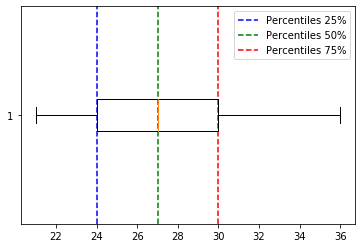

In [119]:
fig, ax = plt.subplots()
for pct,lb,c in zip(percentiles.tolist(),percentlab,clr):
    plt.axvline(x=pct,linestyle='--',label="Percentiles {}".format(lb),c=c)
ax.boxplot(df['Age'],vert=False)
plt.legend()

* The first quartile (also called lower quartile) is 24 (note that 24 is also the 25th percentile).
* The second quartile (also called the middle quartile) is 27 (note that 27 is also the 50th percentile).
* And the third quartile (also called the upper quartile) is 30 (note that 30 is also the 75th percentile).

## Custom percentiles

In [121]:
df['Age'].describe(percentiles=[.1,.15,.33,.5]).iloc[4:8]

10%    23.0
15%    23.0
33%    25.0
50%    27.0
Name: Age, dtype: float64

In [129]:
age = df['Age'].describe()
age

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

In [134]:
age_upper_quartile = age.iloc[6]
age_middle_quartile = age.iloc[5]
age_95th_percentile = df['Age'].describe(percentiles=[.95]).iloc[5]

---
# Grouped Frequency Distribution 

In [138]:
freq_dist = df['Weight'].value_counts().sort_index()
freq_dist.head()

55.0    1
57.0    1
58.0    1
59.0    2
62.0    1
Name: Weight, dtype: int64

In [142]:
grouped_freq_dist = df['Weight'].value_counts(bins=10).sort_index()
grouped_freq_dist.head()

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
Name: Weight, dtype: int64

The **(** character indicates that the starting point is not included, while the **]** indicates that the endpoint is included. 

(54.941, 60.8] means that 54.941 isn't included in the interval, while 60.8 is. 

The interval (54.941, 60.8] contains all real numbers greater than 54.941 and less than or equal to 60.8.

Each group (interval) in a grouped frequency distribution table is also known as a class interval. (54.941, 60.8], for instance, is a **class interval**.

In [148]:
grouped_freq_table = df['PTS'].value_counts(bins=10,normalize=True).sort_index(ascending=False) * 100
grouped_freq_table

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64

# Information Loss


Information loss in grouped frequency.

In [151]:
df['PTS'].value_counts(bins = 10).head()

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(234.8, 293.0]    17
(118.4, 176.6]    17
Name: PTS, dtype: int64

there are 30 players who scored between 2 and 60 points (2 is the minimum value in our data set, and points in basketball can only be integers). However, because we grouped the values, we lost more granular information

e.g. How many players, if any, scored exactly 50 points.

To get back this granular information, 

* increase the number of class intervals -> table that's lengthy and very difficult to analyze.

* decrease the number of class intervals -> lose even more information

<img src="assets/image/s1m3_tradeoff.svg">

10 is a good number of class intervals to choose because it offers a good balance between information and comprehensibility.

In [156]:
grouped_freq = df['MIN'].value_counts(bins=10).sort_index()

In [162]:
grouped_freq.values

array([19, 10, 17, 15, 13, 12, 15, 14, 19,  9])

## Improve Grouped Freq Index

create int interval

In [173]:
inx = pd.interval_range(0,600,freq=100)
inx

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')

In [176]:
ngrp_freq = pd.Series([0 for i in inx], index=inx)
ngrp_freq

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64

In [180]:
grp_freq = df['PTS'].value_counts(bins=6).sort_index()
print(grp_freq.sum())
grp_freq

143


(1.417, 99.0]     48
(99.0, 196.0]     27
(196.0, 293.0]    33
(293.0, 390.0]    13
(390.0, 487.0]    13
(487.0, 584.0]     9
Name: PTS, dtype: int64

In [177]:
for i in df['PTS']:
    for j in index:
        if i in j:
            ngrp_freq.loc[j] += 1
            break


In [181]:
print(ngrp_freq.sum())
ngrp_freq

143


(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64

In [191]:
ix = pd.interval_range(start=0,end=600,periods=10)

In [201]:
gr_freq_table_10 = pd.Series([0 for i in ix], index=ix)
gr_freq_table_10

(0, 60]       0
(60, 120]     0
(120, 180]    0
(180, 240]    0
(240, 300]    0
(300, 360]    0
(360, 420]    0
(420, 480]    0
(480, 540]    0
(540, 600]    0
dtype: int64

In [202]:
df['PTS'].value_counts(bins=10).sort_index()

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64

In [203]:
for i in df['PTS']:
    for j in gr_freq_table_10.index:
        if i in j:
            gr_freq_table_10.loc[j] += 1

In [204]:
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

In [205]:
pd.interval_range(0,600,periods=10)

IntervalIndex([(0, 60], (60, 120], (120, 180], (180, 240], (240, 300], (300, 360], (360, 420], (420, 480], (480, 540], (540, 600]],
              closed='right',
              dtype='interval[int64]')

In [206]:
wnba = pd.read_csv('wnba.csv')
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0 for _ in range(10)], index = intervals)

for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break

In [207]:
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

In [211]:
wnba = pd.read_csv('wnba.csv')

inx = pd.interval_range(start=0,end=600,freq=60)

gr_freq_table_10 = pd.Series([0 for i in inx],index=inx)
for i in wnba['PTS']:
    for j in gr_freq_table_10.index:
        if i in j:
            gr_freq_table_10.loc[j] += 1
            break
            
print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64
